<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/KaggleMNIST/KaggleMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [5]:
#Importing the data: train, test, samplesubmission
train_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Train.csv')
test_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Test.csv')
ss_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Sample_Submission.csv')

In [17]:
#Visualizing the data we pulled (TRAINING)
print("Training Data Set Shape : ",train_df.values.shape, "\n")
print(train_df.values[1,1:])

Training Data Set Shape :  (42000, 785) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 

Training Data  --▶  <font color = "gray"> 42,000 Rows, 785 Columns </font>

In [18]:
#Visualizing the data we pulled (TESTING)
print("Testing Data Set Shape : ",test_df.values.shape, "\n")
print(test_df.values[1,1:])

Testing Data Set Shape :  (28000, 784) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29  85
  85  85  85  85  85  85  85  71   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 107 128 168 250 250 250 252 250 250 250 250 231
 127  63   0   0   0   0   0   0   0   0   0   0   0   0  85 168 237 252
 250 250 2

Testing Data  --▶  <font color = "gray"> 28,000 Rows, 784 Columns (Missing the label column) </font>

In [19]:
#Visualizing the data we pulled (SAMPLE SUBMISSION)
print("Testing Data Set Shape : ",ss_df.values.shape, "\n")

#should be 28,000 rows as that is how many rows we see in the test set
#should be two columns, ImageId and Label

Testing Data Set Shape :  (28000, 2) 



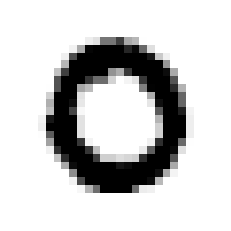

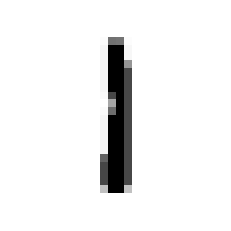

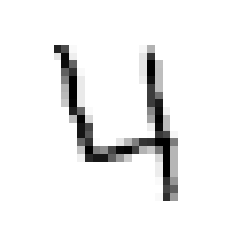

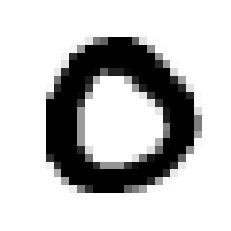

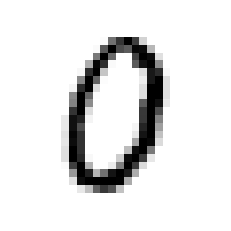

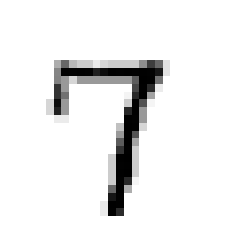

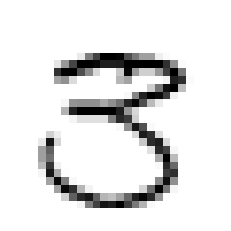

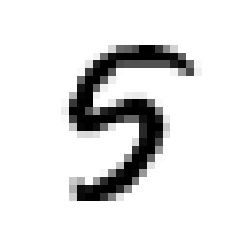

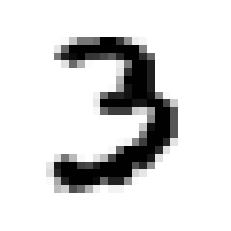

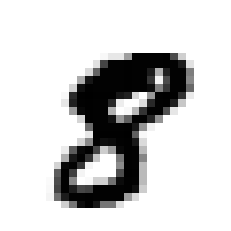

In [35]:
#Representing the first 10 rows in the training data set to 
#visualize the numbers and types of numbers we are working with

for row in range(1,11):

  #row number 'row' and 'everything after the label' columns
  myNumber = train_df.values[row,1:]

  #28x28 pixel grid
  myNumber=myNumber.reshape((28,28))
  plt.imshow(myNumber, cmap = plt.cm.binary,interpolation="nearest")
  plt.axis("off")
  plt.show()

Distribution Counts by Label Number in Training Set:




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


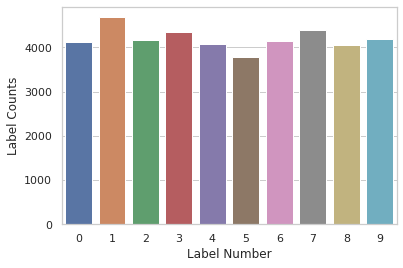

In [51]:
#histogram showing distribution of the labels we have in the training set
print("Distribution Counts by Label Number in Training Set:\n\n")

sns.set_theme(style="whitegrid")
sns.barplot(train_df['label'].value_counts().index , train_df['label'].value_counts())
plt.ylabel('Label Counts')
plt.xlabel('Label Number')
plt.show()

In [61]:
#rnd_pca = PCA(n_components=154)
#rnd_pca = PCA(n_components=169)

#Set multiple n_components for testing
rnd_pca1 = PCA(n_components=1)
rnd_pca2 = PCA(n_components=2)
rnd_pca3 = PCA(n_components=3)
rnd_pca4 = PCA(n_components=4)
rnd_pca5 = PCA(n_components=5)
rnd_pca10 = PCA(n_components=10)
rnd_pca25 = PCA(n_components=25)
rnd_pca50 = PCA(n_components=50)
rnd_pca75 = PCA(n_components=75)
rnd_pca100 = PCA(n_components=100)
rnd_pca150 = PCA(n_components=150)
rnd_pca200 = PCA(n_components=200)

rnd_pca1.fit(train_df.values[:,1:])
rnd_pca2.fit(train_df.values[:,1:])
rnd_pca3.fit(train_df.values[:,1:])
rnd_pca4.fit(train_df.values[:,1:])
rnd_pca5.fit(train_df.values[:,1:])
rnd_pca10.fit(train_df.values[:,1:])
rnd_pca25.fit(train_df.values[:,1:])
rnd_pca50.fit(train_df.values[:,1:])
rnd_pca75.fit(train_df.values[:,1:])
rnd_pca100.fit(train_df.values[:,1:])
rnd_pca150.fit(train_df.values[:,1:])
rnd_pca200.fit(train_df.values[:,1:])

X_reduced1 = rnd_pca1.transform(train_df.values[:,1:])
X_reduced2 = rnd_pca2.transform(train_df.values[:,1:])
X_reduced3 = rnd_pca3.transform(train_df.values[:,1:])
X_reduced4 = rnd_pca4.transform(train_df.values[:,1:])
X_reduced5 = rnd_pca5.transform(train_df.values[:,1:])
X_reduced10 = rnd_pca10.transform(train_df.values[:,1:])
X_reduced25 = rnd_pca25.transform(train_df.values[:,1:])
X_reduced50 = rnd_pca50.transform(train_df.values[:,1:])
X_reduced75 = rnd_pca75.transform(train_df.values[:,1:])
X_reduced100 = rnd_pca100.transform(train_df.values[:,1:])
X_reduced150 = rnd_pca150.transform(train_df.values[:,1:])
X_reduced200 = rnd_pca200.transform(train_df.values[:,1:])

print (X_reduced1.shape)
print (X_reduced2.shape)
print (X_reduced3.shape)
print (X_reduced4.shape)
print (X_reduced5.shape)
print (X_reduced10.shape)
print (X_reduced25.shape)
print (X_reduced50.shape)
print (X_reduced75.shape)
print (X_reduced100.shape)
print (X_reduced150.shape)
print (X_reduced200.shape)

(42000, 1)
(42000, 2)
(42000, 3)
(42000, 4)
(42000, 5)
(42000, 10)
(42000, 25)
(42000, 50)
(42000, 75)
(42000, 100)
(42000, 150)
(42000, 200)


28


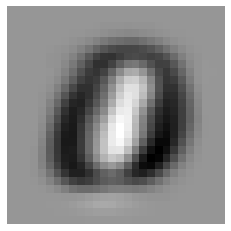

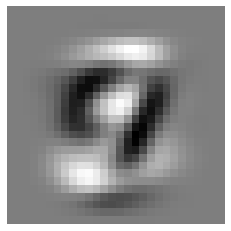

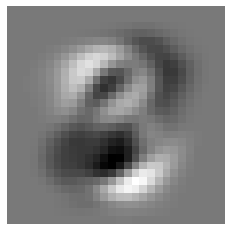

In [ ]:
#eigennumbers = rnd_pca.components_.reshape((154,28,28))
#eigennumbers = rnd_pca.components_.reshape((169,28,28))
eigennumbers = rnd_pca.components_.reshape((4,28,28))
myNumber = eigennumbers[0]
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

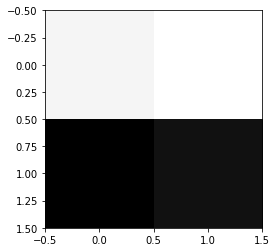

In [ ]:
import math
myNumber = X_reduced[0,:]
myNumber=myNumber.reshape((2,2))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

In [ ]:
#clf1 = LogisticRegression(max_iter=10000, solver='saga',)

clf1.fit(data[:,1:], data[:, 0] )

In [62]:
clf1 = LogisticRegression(solver='saga', max_iter=10000)
clf2 = LogisticRegression(solver='saga', max_iter=10000)
clf3 = LogisticRegression(solver='saga', max_iter=10000)
clf4 = LogisticRegression(solver='saga', max_iter=10000)
clf5 = LogisticRegression(solver='saga', max_iter=10000)
clf10 = LogisticRegression(solver='saga', max_iter=10000)
clf25 = LogisticRegression(solver='saga', max_iter=10000)
clf50 = LogisticRegression(solver='saga', max_iter=10000)
clf75 = LogisticRegression(solver='saga', max_iter=10000)
clf100 = LogisticRegression(solver='saga', max_iter=10000)
clf150 = LogisticRegression(solver='saga', max_iter=10000)
clf200 = LogisticRegression(solver='saga', max_iter=10000)

clf1.fit(X_reduced1, train_df.values[:, 0] )
clf2.fit(X_reduced2, train_df.values[:, 0] )
clf3.fit(X_reduced3, train_df.values[:, 0] )
clf4.fit(X_reduced4, train_df.values[:, 0] )
clf5.fit(X_reduced5, train_df.values[:, 0] )
clf10.fit(X_reduced10, train_df.values[:, 0] )
clf25.fit(X_reduced25, train_df.values[:, 0] )
clf50.fit(X_reduced50, train_df.values[:, 0] )
clf75.fit(X_reduced75, train_df.values[:, 0] )
clf100.fit(X_reduced100, train_df.values[:, 0] )
clf150.fit(X_reduced150, train_df.values[:, 0] )
clf200.fit(X_reduced200, train_df.values[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [63]:
predict1 = clf1.predict(X_reduced1)
print("Accuracy 1 = ", accuracy_score(predict1, train_df.values[:, 0]))

predict2 = clf2.predict(X_reduced2)
print("Accuracy 2 = ", accuracy_score(predict2, train_df.values[:, 0]))

predict3 = clf3.predict(X_reduced3)
print("Accuracy 3 = ", accuracy_score(predict3, train_df.values[:, 0]))

predict4 = clf4.predict(X_reduced4)
print("Accuracy 4 = ", accuracy_score(predict4, train_df.values[:, 0]))

predict5 = clf5.predict(X_reduced5)
print("Accuracy 5 = ", accuracy_score(predict5, train_df.values[:, 0]))

predict10 = clf10.predict(X_reduced10)
print("Accuracy 10 = ", accuracy_score(predict10, train_df.values[:, 0]))

predict25 = clf25.predict(X_reduced25)
print("Accuracy 25 = ", accuracy_score(predict25, train_df.values[:, 0]))

predict50 = clf50.predict(X_reduced50)
print("Accuracy 50 = ", accuracy_score(predict50, train_df.values[:, 0]))

predict75 = clf75.predict(X_reduced75)
print("Accuracy 75 = ", accuracy_score(predict75, train_df.values[:, 0]))

predict100 = clf100.predict(X_reduced100)
print("Accuracy 100 = ", accuracy_score(predict100, train_df.values[:, 0]))

predict150 = clf150.predict(X_reduced150)
print("Accuracy 150 = ", accuracy_score(predict150, train_df.values[:, 0]))

predict200 = clf200.predict(X_reduced200)
print("Accuracy 200 = ", accuracy_score(predict200, train_df.values[:, 0]))


Accuracy 1 =  0.2882857142857143
Accuracy 2 =  0.4175714285714286
Accuracy 3 =  0.4414047619047619
Accuracy 4 =  0.5606904761904762
Accuracy 5 =  0.6554047619047619
Accuracy 10 =  0.7865952380952381
Accuracy 25 =  0.8766666666666667
Accuracy 50 =  0.9032142857142857
Accuracy 75 =  0.9133333333333333
Accuracy 100 =  0.9182380952380952
Accuracy 150 =  0.9245238095238095
Accuracy 200 =  0.9283095238095238


In [ ]:
mnistTest = pd.read_csv('MnistTest.csv')
test = mnistTest.values
XTest_reduced = rnd_pca.transform(test)
print(XTest_reduced.shape)
predict = clf1.predict(XTest_reduced)

(28000, 4)


In [ ]:
mnistTest.info()
mnistTest.index.name='ImageId'

mnistTest['label']=predict

mnistTest.index+=1
mnistTest['label'].to_csv('Mnist2x2.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
